In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 62kB/s 


In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/cotton_disease/train'
valid_path = '/content/drive/My Drive/cotton_disease/test'

In [3]:
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

234553344/234545216 [==============================] - 4s 0us/step


In [4]:

# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [5]:
folders = glob('/content/drive/My Drive/cotton_disease/train/*')

In [7]:
xg

In [8]:
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=resnet152V2.inputs,outputs=prediction)

In [9]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

In [17]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
                                 

In [13]:
training_set=train_datagen.flow_from_directory('/content/drive/My Drive/cotton_disease/train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')


Found 1951 images belonging to 4 classes.


In [14]:
test_set=test_datagen.flow_from_directory('/content/drive/My Drive/cotton_disease/test',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical'
                                          )

Found 18 images belonging to 4 classes.


In [18]:
r=model.fit_generator(training_set,
                      validation_data=test_set,
                      epochs=20,
                      steps_per_epoch=len(training_set),
                      validation_steps=len(test_set)
                      )

Epoch 1/20
61/61 [==============================] - 1145s 19s/step - loss: 1.1673 - accuracy: 0.8437 - val_loss: 0.3666 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 40s 660ms/step - loss: 0.5013 - accuracy: 0.9247 - val_loss: 0.2253 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 40s 656ms/step - loss: 0.4733 - accuracy: 0.9267 - val_loss: 1.4453 - val_accuracy: 0.9444
Epoch 4/20
61/61 [==============================] - 40s 658ms/step - loss: 0.3206 - accuracy: 0.9508 - val_loss: 0.1012 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 40s 660ms/step - loss: 0.4512 - accuracy: 0.9467 - val_loss: 0.2938 - val_accuracy: 0.8889
Epoch 6/20
61/61 [==============================] - 40s 658ms/step - loss: 0.3251 - accuracy: 0.9621 - val_loss: 0.5740 - val_accuracy: 0.8889
Epoch 7/20
61/61 [==============================] - 40s 663ms/step - loss: 0.2353 - accuracy: 0.9687 - val_loss: 0.0769 - val_accuracy: 0.9444

In [19]:

import matplotlib.pyplot as plt

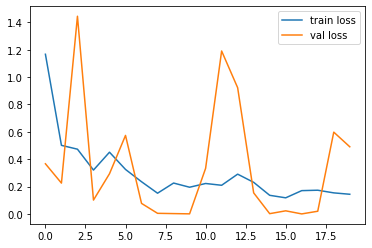

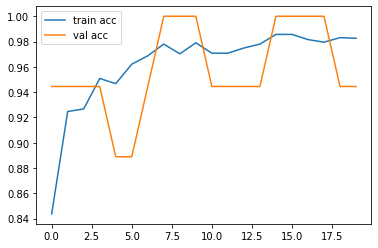

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [22]:
y_pred = model.predict(test_set)

In [23]:
y_pred

array([[2.9377018e-18, 1.0000000e+00, 5.1247646e-34, 2.1680272e-25],
       [2.1262031e-14, 1.3315658e-12, 1.0000000e+00, 1.9614737e-12],
       [4.9669228e-26, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [9.6370483e-20, 2.2441172e-21, 3.3556902e-18, 1.0000000e+00],
       [2.9930458e-28, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [3.9673472e-21, 9.9985445e-01, 7.0675562e-33, 1.4556761e-04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0457023e-31, 0.0000000e+00, 0.0000000e+00],
       [5.5821225e-17, 3.6914882e-16, 1.6114493e-09, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [5.3845388e-32, 1.3127427e-28, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 2.4178855e-36, 3.0823969e-34],
       [1.0000000e+00, 4.4634388e-20, 1.8975087e-21, 0.0000000e+00],
       [0.0000000e+00, 5.1646170e-

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:

y_pred

array([1, 2, 2, 3, 2, 1, 1, 0, 3, 1, 1, 2, 1, 0, 3, 2, 3, 0])

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
model=load_model('model_resnet152V2.h5')